## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('dataset/Index2018.csv')
df = df_raw.copy()
df

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [3]:
## checking for null values
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


**date column is not in datetime type, to changing its datatype**

In [5]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [6]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [7]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## Plotting the data

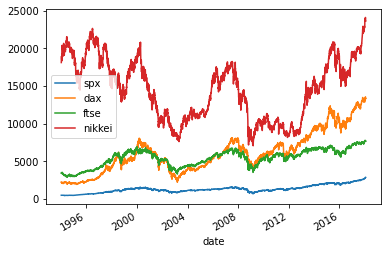

In [8]:
df.plot(y=['spx','dax','ftse','nikkei'],x='date')
plt.show()

<AxesSubplot:title={'center':'S&P500 Prices'}>

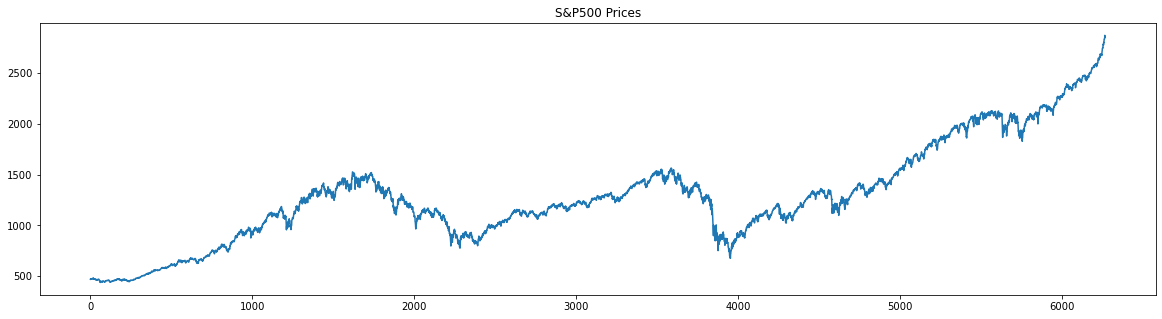

In [9]:
df.spx.plot(figsize=(20,5),title='S&P500 Prices')

<AxesSubplot:title={'center':'FTS100 Prices'}>

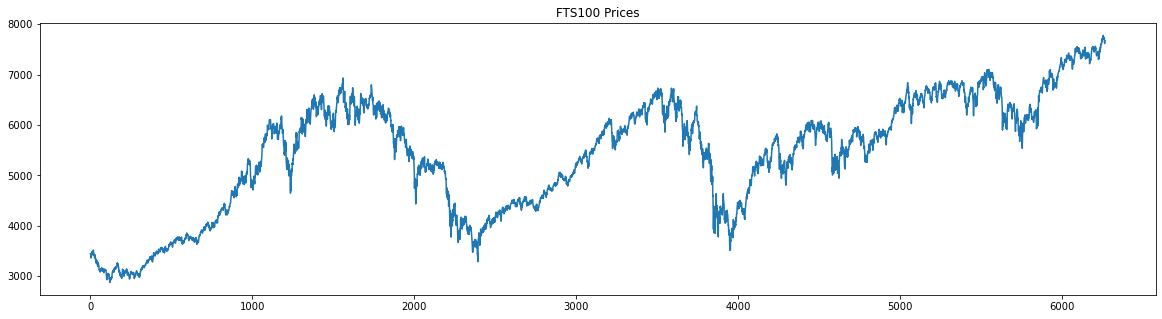

In [10]:
df.ftse.plot(figsize=(20,5),title='FTS100 Prices')

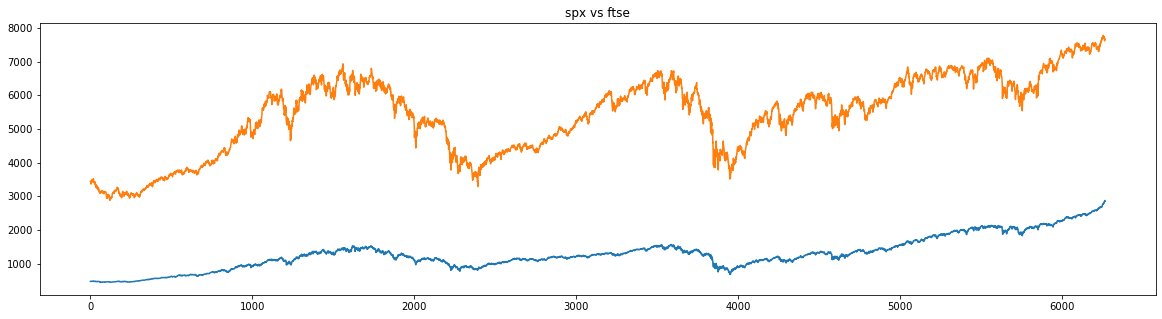

In [11]:
#combining in onne graph:
df.spx.plot(figsize=(20,5),title='S&P500 Prices')
df.ftse.plot(figsize=(20,5),title='FTS100 Prices')
plt.title('spx vs ftse')
plt.show()

## The Quantile-Quantile plot(QQ Plot)

In [12]:
import scipy.stats
import pylab

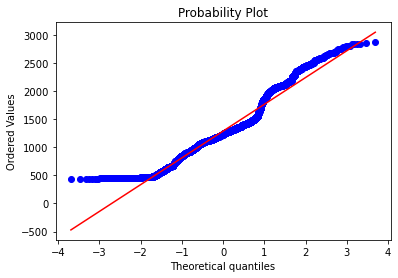

In [13]:
scipy.stats.probplot(df.spx,plot=pylab)
pylab.show()
#redline- what the datapoints should follow, if they are normally distibuted,
#we have more values around 500, so data is not normally distributed.
#x-axis : how many standard deviations away from the mean these values are.


In [14]:
df.date.describe()

C:\Users\DELL\AppData\Local\Temp/ipykernel_1852/1371252037.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the Index

In [15]:
df.set_index('date',inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Desired Frequency

In [16]:
# df = df.asfreq('m') #setting frequecy to month
df = df.asfreq('b') #setting its frequency to business days only
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


## Handling Missing Values

In [17]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [18]:
df[df.spx.isna() == True]

,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


In [19]:
#frontfilling - assign the value of the previous period
df.spx.fillna(method='ffill',inplace=True)
df.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [20]:
#backfilling - assign the value from next period
df.dax.fillna(method='bfill',inplace=True)
df.nikkei.fillna(method='bfill',inplace=True)

df.isna().sum()

spx       0
dax       0
ftse      8
nikkei    0
dtype: int64

In [21]:
#mean
df.ftse.fillna(value=df.ftse.mean(),inplace=True)
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying Dataset

In [22]:
df.rename(columns={'spx':'market_value'},inplace=True)
df.drop(columns=['dax','ftse','nikkei'],inplace=True)
df

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


## Splitting the data

In [23]:
size = int(len(df) * 0.8)
size

5021

In [24]:
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [25]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [27]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## White Noise 
A sequence of random data, where value has a time-period associated with it.<br>
condition to be white noise:
1. constant mean
2. constant variance
3. no autocorrelation

In [40]:
wn = np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(),size=len(df_train))
wn

array([2093.92011511, 1597.75648732, 1390.69407624, ..., 1567.82254302,
        861.75488909,  909.04941775])

In [41]:
df_train['wn'] = wn

C:\Users\DELL\AppData\Local\Temp/ipykernel_1852/2767877954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['wn'] = wn


In [42]:
df_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1283.490161
std,292.559287,485.846638
min,438.920000,-452.521589
25%,914.620000,955.659905
50%,1144.650000,1275.017374
75%,1316.280729,1613.138294
max,1570.252238,2981.679857


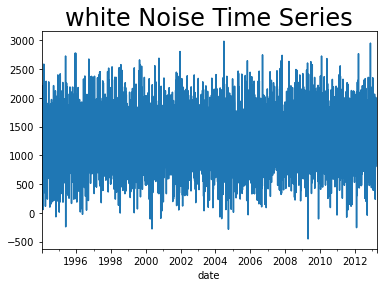

In [43]:
df_train.wn.plot()
plt.title("white Noise Time Series",size=24)
plt.show()

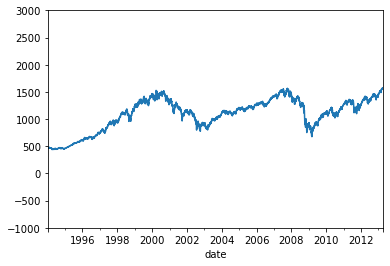

In [44]:
df_train.market_value.plot()
plt.ylim(-1000,3000)
plt.show()

## Random Walk

In [45]:
rw = pd.read_csv('Dataset/RandWalk.csv')
rw['date'] = pd.to_datetime(rw['date'])
rw.set_index('date',inplace=True)
rw = rw.asfreq('b')
rw.describe()

,price
count,5020.000000
mean,1270.104756
std,444.064313
min,574.382397
25%,932.331267
50%,1157.158604
75%,1488.403748
max,2715.508720


In [46]:
df_train['rw'] = rw['price']
df_train

C:\Users\DELL\AppData\Local\Temp/ipykernel_1852/2662832184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['rw'] = rw['price']


,market_value,wn,rw
date,,,
1994-01-07,469.900000,2093.920115,1231.997040
1994-01-10,475.270000,1597.756487,1116.460877
1994-01-11,474.130000,1390.694076,1144.203545
1994-01-12,474.170000,1220.528564,1179.172504
1994-01-13,472.470000,1116.301108,1067.146255
...,...,...,...
2013-04-01,1562.173837,1345.494458,2131.040117
2013-04-02,1570.252238,1813.030043,1967.652494
2013-04-03,1553.686978,1567.822543,2063.828303


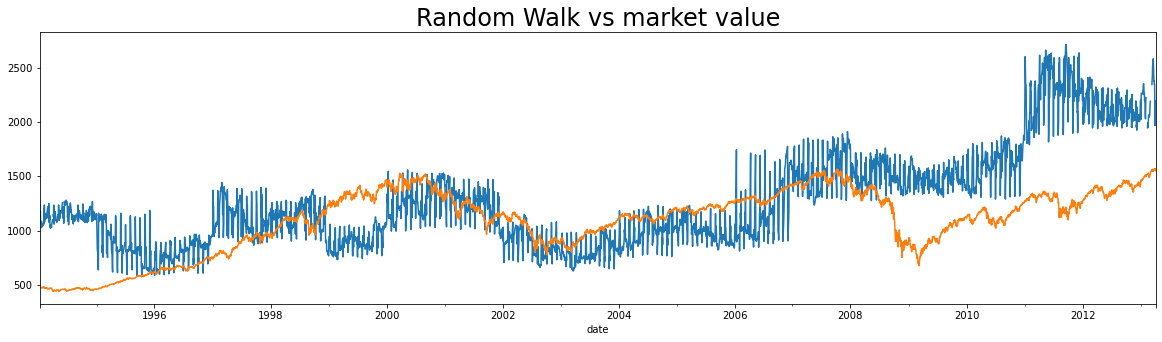

In [51]:
df_train.rw.plot(figsize=(20,5))
df_train.market_value.plot(figsize=(20,5))
plt.title('Random Walk vs market value',size=24)

plt.show()